In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
price_1 = pd.read_csv("sample_data/msft_price.csv")
price_2 = pd.read_csv("sample_data/tsla_price.csv")

In [3]:
dataset = pd.DataFrame()
dataset['x'] = price_1['Close'].pct_change().dropna()
dataset['y'] = price_2['Close'].pct_change().dropna()

In [4]:
# random_state=42 to ensure reproducible
dataset_in, dataset_out= train_test_split(dataset, test_size=0.2, random_state=42)

In [10]:
x, y = np.array(x).reshape(-1,1), dataset_in['y']
linreg = LinearRegression(fit_intercept=False)
obj = linreg.fit(x, y)
trendline = linreg.predict(x)

Text(0.5, 1.0, 'msft return against tsla return\nintercept=0.0000, coef=[0.92588157]')

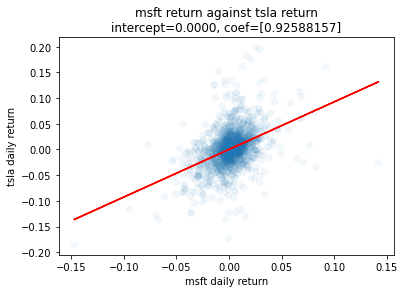

In [12]:
plt.scatter(x, y, alpha=0.05)
plt.plot(x, trendline, color='red')
plt.xlabel('msft daily return'); plt.ylabel('tsla daily return')
plt.title('msft return against tsla return\nintercept={:.4f}, coef={}'.format(linreg.intercept_, linreg.coef_))